[](https://meduza.io/image/attachments/images/002/887/720/large/tvpOn7ljCevpmxxWbfxBuw.png)

# Полезные ссылки:

[Избирком](http://www.vybory.izbirkom.ru/region/region/izbirkom?action=show&root=1&tvd=100100084849066&vrn=100100084849062&region=0&global=1&sub_region=0&prver=0&pronetvd=null&vibid=100100084849066&type=226)

[Какие бывают аномалии?](http://www.vokrugsveta.ru/nauka/article/157463/)

[fb Сергей Шпилькина](https://www.facebook.com/sergey.shpilkin)

[Графики Шпилькина по областям](https://www.facebook.com/media/set/?set=ms.c.eJxFlMmRxUAIQzOaYl~%3ByT2zK4kNfX4FQC2wOt8oszlbj4j~%3B~_gbQgKpMDiorsBZ0A4T9QNBrBBxwaYgeaJdIqF7AMuAp2aNir6AG6QAyidGOloBG1QMeHng8dUTlRHVE5UVNo~_AOwns~_YjyifqBtaLqDyQAXFgYZG0oJggOc0HBrPacAY9flIGXAaGWiRA0UQtT4w1u2s1wREN7axSopr6XGqK9o8FSfaEqigNYb4IjXkAKao75SeTPUybcfzI6~%3BCfYAdwH2o7qI6Ph~%3Ba~%3BfNRpGjxtgUzRXZKkeFwvWSBCzSYDgTALqooEKHHTQn7KqprQWJRIryg8Ba3qyhHS~_aCRkBC64OJPsAdB5AY12oww1jZVQg~_D96AimWmbEDFKp8P6wdiwObBRmiR8zGJsb~_KBNhllzQ0VK~_ikanpaghBNOOBqbgpwlPhD~_BwqXYNIkjd6MZKDdiQRUfjjdXRiNOYx~_Uba9hcch3Aaesb63CqeS3zmWpeRQx4U3Ja7i1K3zlE9zktbC4yDtQAu0yxSiI7DbxW76SUcafhdCAxZf~_4pYLXhsk~%3BkawqTQ~-~-.bps.a.1654877677934195.1073741835.100002359376948&type=1)

[Разбор "Пилы Чурова"](https://podmoskovnik.livejournal.com/179262.html)

[Графики прошлых выборов](https://drive.google.com/drive/folders/0ByFMnUnpIlrieGNPMGlWTlc2Nmc)

["Ставропольское чудо"](https://podmoskovnik.livejournal.com/179463.html)

["Нормализация Якутии"](https://www.facebook.com/photo.php?fbid=1655974634491166&set=a.503124413109533.1073741826.100002359376948&type=3&theater)

[Разбор временнОй явки](https://meduza.io/feature/2018/03/28/vo-vremya-vyborov-yavka-na-nekotoryh-uchastkah-utrom-byla-bolshe-chem-summarnaya-po-itogam-dnya-kak-eto)

[Чемпионы по округлению](https://vsvor.livejournal.com/1838.html?utm_source=fbsharing&utm_medium=social)

[Анализ 2018 с интерактивной картой](https://habrahabr.ru/post/352424/)

[Анализ Думских выборов 2016](https://habrahabr.ru/post/279157/) [Сам репозиторий](https://github.com/alexanderkuk/analyze-izbirkom2/blob/master/notes.ipynb)

[Ссылки на анализы старых выборов](https://www.facebook.com/alexander.shen.182/posts/10155711668778423)


In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns
plt.style.use('seaborn-poster')

In [2]:
df3 = pd.read_csv('results_20_Mar_2018_12_03/table_227_level_3.txt', sep='\t')
df3

,region,tik,uik,"Число избирателей, включенных в список избирателей","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям, проголосовавшим досрочно","Число избирательных бюллетеней, выданных в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных вне помещения для голосования в день голосования",Число погашенных избирательных бюллетеней,Число избирательных бюллетеней в переносных ящиках для голосования,Число бюллетеней в стационарных ящиках для голосования,Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Бабурин Сергей Николаевич,Грудинин Павел Николаевич,Жириновский Владимир Вольфович,Путин Владимир Владимирович,Собчак Ксения Анатольевна,Сурайкин Максим Александрович,Титов Борис Юрьевич,Явлинский Григорий Алексеевич,url
0,98 Город Байконур (Республика Казахстан),98 Город Байконур (Республика Казахстан),УИК №8140,2132,2000,0,1447,11,542,11,1447,9,1449,0,0,4,176,79,1136,30,9,5,10,http://www.vybory.izbirkom.ru/region/izbirkom?...
1,98 Город Байконур (Республика Казахстан),98 Город Байконур (Республика Казахстан),УИК №8141,2207,2000,0,1470,14,516,14,1470,14,1470,0,0,2,128,87,1214,19,4,7,9,http://www.vybory.izbirkom.ru/region/izbirkom?...
2,98 Город Байконур (Республика Казахстан),98 Город Байконур (Республика Казахстан),УИК №8142,2249,2000,0,1490,7,503,7,1490,27,1470,0,0,5,171,94,1162,17,3,12,6,http://www.vybory.izbirkom.ru/region/izbirkom?...
3,98 Город Байконур (Республика Казахстан),98 Город Байконур (Республика Казахстан),УИК №8143,1769,1500,0,1065,48,387,48,1065,20,1093,0,0,5,98,72,882,17,8,5,6,http://www.vybory.izbirkom.ru/region/izbirkom?...
4,98 Город Байконур (Республика Казахстан),98 Город Байконур (Республика Казахстан),УИК №8144,1880,1500,0,1171,13,316,13,1171,10,1174,0,0,7,124,105,902,7,9,10,10,http://www.vybory.izbirkom.ru/region/izbirkom?...
5,98 Город Байконур (Республика Казахстан),98 Город Байконур (Республика Казахстан),УИК №8145,2047,1900,0,1302,13,585,13,1302,14,1301,0,0,1,138,96,1022,18,9,5,12,http://www.vybory.izbirkom.ru/region/izbirkom?...
6,98 Город Байконур (Республика Казахстан),98 Город Байконур (Республика Казахстан),УИК №8146,2291,1900,0,1546,62,292,62,1546,10,1598,0,0,8,191,95,1250,22,9,6,17,http://www.vybory.izbirkom.ru/region/izbirkom?...
7,99 Территория за пределами РФ,99 Территория за пределами РФ,УИК №8000,5297,11000,694,4557,46,5703,740,4557,175,5122,0,0,46,159,80,4779,30,12,5,11,http://www.vybory.izbirkom.ru/region/izbirkom?...
8,99 Территория за пределами РФ,99 Территория за пределами РФ,УИК №8001,3287,3600,0,3235,52,313,52,3235,136,3151,0,0,18,32,22,3062,12,4,1,0,http://www.vybory.izbirkom.ru/region/izbirkom?...
9,99 Территория за пределами РФ,99 Территория за пределами РФ,УИК №8002,2995,9000,265,2713,17,6005,282,2713,149,2846,0,0,19,122,68,2607,15,6,3,6,http://www.vybory.izbirkom.ru/region/izbirkom?...


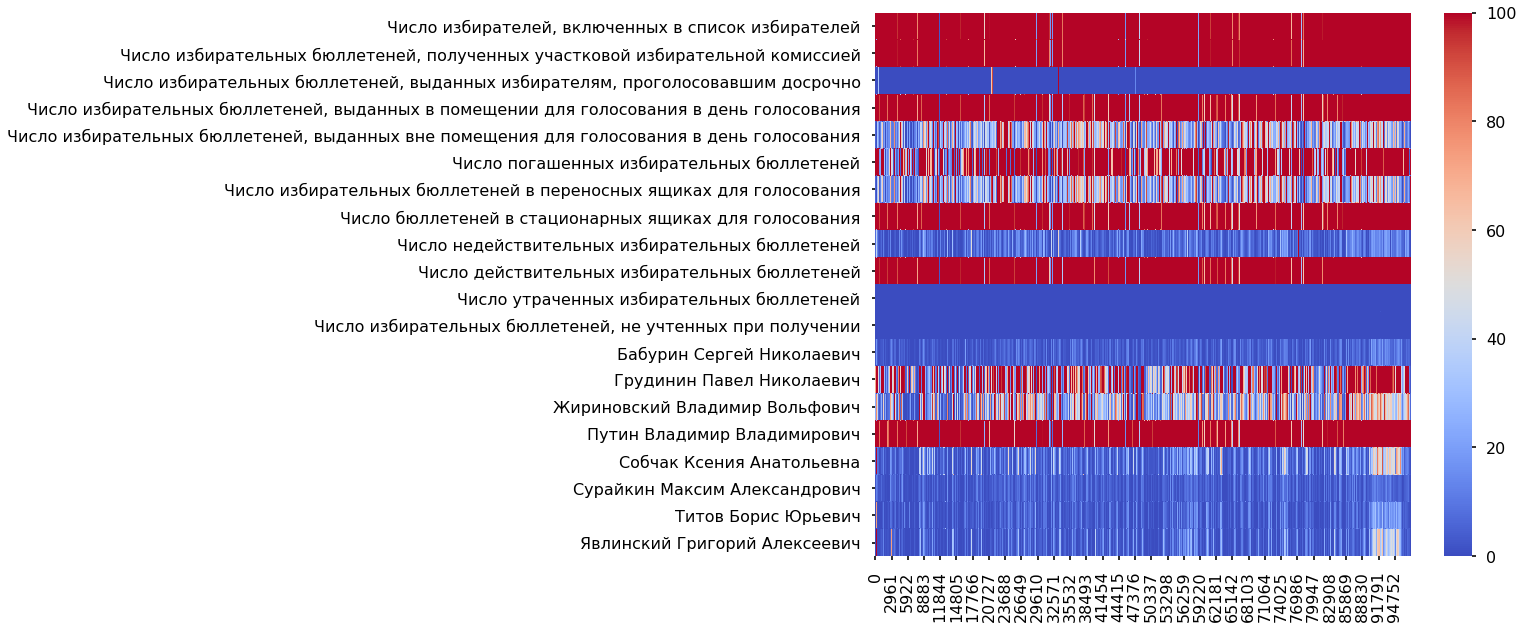

In [4]:
df_array = df3.select_dtypes(include=['int64']).T
plt.figure(figsize=(12, 10))
sns.heatmap(df_array, vmax=100, cmap='coolwarm');

In [5]:
df3_describe = df3.describe(percentiles=[]).T
df3_describe['sum'] = df3_describe['count'] * df3_describe['mean'] 
df3_describe

,count,mean,std,min,50%,max,sum
"Число избирателей, включенных в список избирателей",97694.0,1115.650480,814.027931,3.0,1012.0,8428.0,108992358.0
"Число избирательных бюллетеней, полученных участковой избирательной комиссией",97694.0,1053.112320,860.074921,3.0,970.0,66545.0,102882755.0
"Число избирательных бюллетеней, выданных избирателям, проголосовавшим досрочно",97694.0,2.243126,41.225400,0.0,0.0,4006.0,219140.0
"Число избирательных бюллетеней, выданных в помещении для голосования в день голосования",97694.0,701.846183,525.344716,0.0,619.0,6482.0,68566161.0
"Число избирательных бюллетеней, выданных вне помещения для голосования в день голосования",97694.0,49.352069,57.231120,0.0,34.0,2941.0,4821401.0
Число погашенных избирательных бюллетеней,97694.0,299.661289,486.228747,0.0,200.0,64196.0,29275110.0
Число избирательных бюллетеней в переносных ящиках для голосования,97694.0,51.574979,70.027053,0.0,35.0,4007.0,5038566.0
Число бюллетеней в стационарных ящиках для голосования,97694.0,701.345927,524.802040,0.0,619.0,6478.0,68517289.0
Число недействительных избирательных бюллетеней,97694.0,8.094202,9.630038,0.0,6.0,758.0,790755.0
Число действительных избирательных бюллетеней,97694.0,744.826704,535.568167,0.0,673.0,7725.0,72765100.0


In [6]:
# df2 = pd.read_csv('results_20_Mar_2018_12_03/table_227_level_2.txt', sep='\t')
# df2_describe = df2.describe(percentiles=[]).T
# df2_describe['sum'] = df2_describe['count'] * df2_describe['mean'] 
# df2_describe

In [7]:
# df3[~df3['region'].isin(df2['region'])]['region'].unique()

In [8]:
# df3[~df3['region'].isin(df2['region'])]['Число избирателей, включенных в список избирателей'].sum()

In [9]:
# 108516348 + 476010 == 108992358

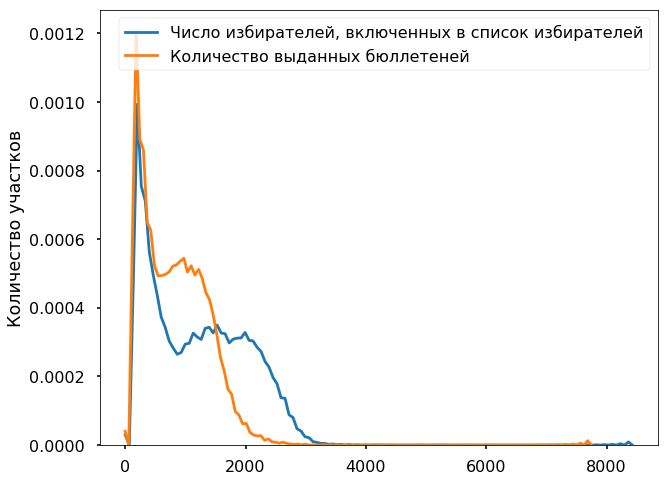

In [10]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)

uik_size = df3['Число избирателей, включенных в список избирателей']
sns.kdeplot(uik_size, label='Число избирателей, включенных в список избирателей', bw=0.0001)

given_bulletins_cols_names = [
     'Число избирательных бюллетеней, выданных избирателям, проголосовавшим досрочно', 
     'Число избирательных бюллетеней, выданных в помещении для голосования в день голосования', 
     'Число избирательных бюллетеней, выданных вне помещения для голосования в день голосования']
given_bulletins = df3[given_bulletins_cols_names].sum(axis=1)
df3['Отдано бюллетеней'] = given_bulletins
sns.kdeplot(given_bulletins, label='Количество выданных бюллетеней', bw=0.0001);

plt.ylabel('Количество участков')
plt.legend();

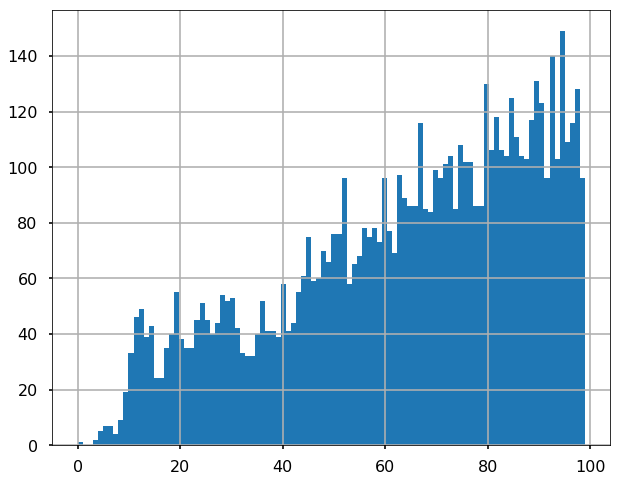

In [11]:
given_bulletins[given_bulletins < 100].hist(bins=100);

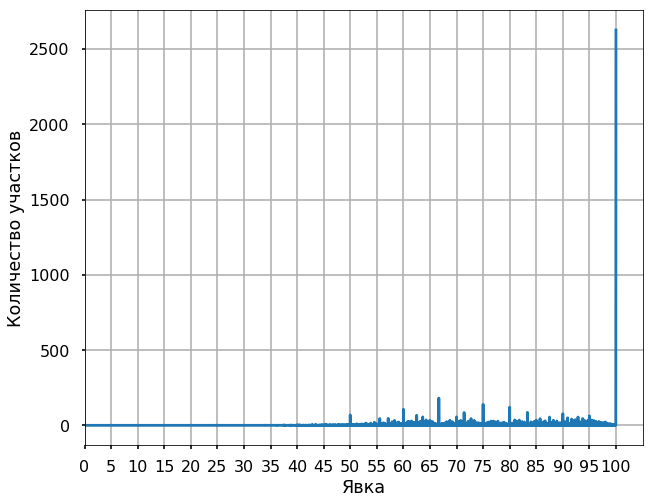

In [12]:
import numpy as np
from collections import Counter
turnout = given_bulletins / uik_size
df3['Явка'] = turnout
turnout2count = np.array(sorted(Counter(turnout).items()))
plt.plot(turnout2count[:,0] * 100, turnout2count[:,1])
plt.xticks(np.arange(0,105, 5))
plt.grid(True)
plt.xlim(0, 105);
plt.xlabel('Явка')
plt.ylabel('Количество участков');

In [13]:
df3_big = df3[uik_size > 500]

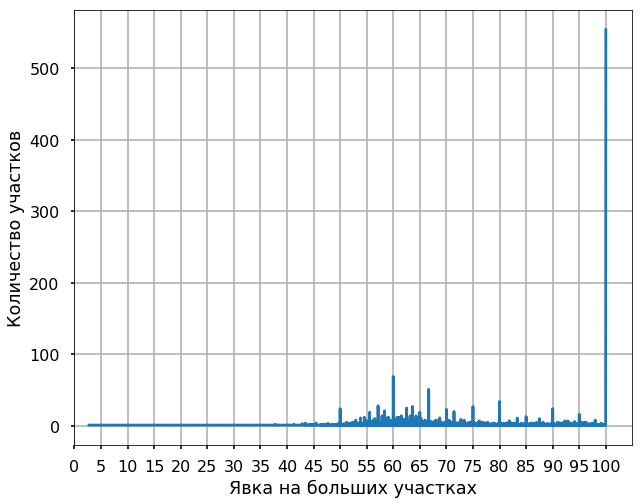

In [14]:
turnout_big2count = np.array(sorted(Counter(df3_big['Явка']).items()))
plt.plot(turnout_big2count[:,0] * 100, turnout_big2count[:,1])
plt.xticks(np.arange(0,105, 5))
plt.grid(True)
plt.xlim(0, 105)
plt.xlabel('Явка на больших участках')
plt.ylabel('Количество участков');

In [15]:
turnout_big2count[np.where(turnout_big2count[:,1] > 25)[0]]

array([[  0.57142857,  28.        ],
       [  0.6       ,  69.        ],
       [  0.63636364,  27.        ],
       [  0.66666667,  51.        ],
       [  0.75      ,  27.        ],
       [  0.8       ,  34.        ],
       [  1.        , 554.        ]])

In [16]:
turnout_big_rounded = np.round(df3_big['Явка'], 2)
turnout_big_rounded2count = np.array(sorted(Counter(turnout_big_rounded).items()))

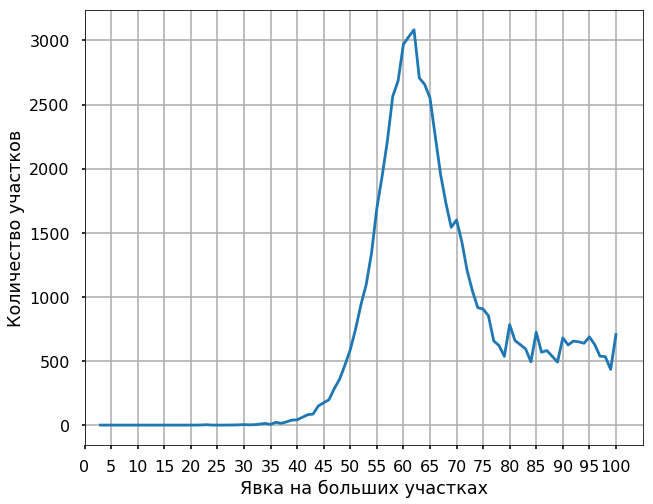

In [17]:
plt.plot(turnout_big_rounded2count[:,0] * 100, turnout_big_rounded2count[:,1]);
plt.xticks(np.arange(0,105, 5))
plt.grid(True)
plt.xlim(0, 105)
plt.xlabel('Явка на больших участках')
plt.ylabel('Количество участков');

In [18]:
df3['region'].unique()

array(['98 Город Байконур (Республика Казахстан)',
       '99 Территория за пределами РФ', 'Республика Адыгея (Адыгея)',
       'Республика Алтай', 'Республика Башкортостан',
       'Республика Бурятия', 'Республика Дагестан',
       'Республика Ингушетия', 'Кабардино-Балкарская Республика',
       'Республика Калмыкия', 'Карачаево-Черкесская Республика',
       'Республика Карелия', 'Республика Коми', 'Республика Крым',
       'Республика Марий Эл', 'Республика Мордовия',
       'Республика Саха (Якутия)', 'Республика Северная Осетия - Алания',
       'Республика Татарстан (Татарстан)', 'Республика Тыва',
       'Удмуртская Республика', 'Республика Хакасия',
       'Чеченская Республика', 'Чувашская Республика - Чувашия',
       'Алтайский край', 'Забайкальский край', 'Камчатский край',
       'Краснодарский край', 'Красноярский край', 'Пермский край',
       'Приморский край', 'Ставропольский край', 'Хабаровский край',
       'Амурская область', 'Архангельская область',
       'Астра

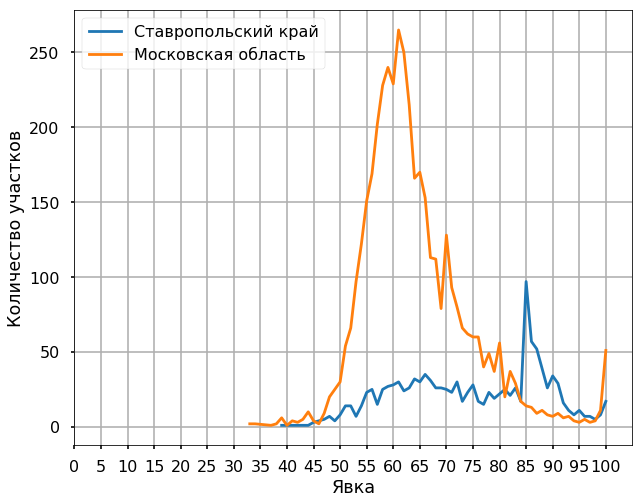

In [19]:
def plot_turnout(df_whole, region_name=None, min_uik_size=200, round_factor=2):
    df_big = df_whole[df_whole['Число избирателей, включенных в список избирателей'] > min_uik_size]
    if region_name is None:
        df = df_big
    else:
        df = df_big[df_big['region'] == region_name]
    turnout_rounded = np.round(df['Явка'], round_factor)
    turnout_rounded2count = np.array(sorted(Counter(turnout_rounded).items()))
    plt.plot(turnout_rounded2count[:,0] * 100, turnout_rounded2count[:,1], label=region_name)
    plt.xticks(np.arange(0,105, 5))
    plt.grid(True)
    plt.xlim(0, 105)
    plt.legend()
    plt.xlabel('Явка')
    plt.ylabel('Количество участков');
    
# plot_turnout(df3, region_name='город Москва')
plot_turnout(df3, region_name='Ставропольский край')
plot_turnout(df3, region_name='Московская область')
# plot_turnout(df3, region_name='99 Территория за пределами РФ')
# plot_turnout(df3, region_name='Белгородская область')

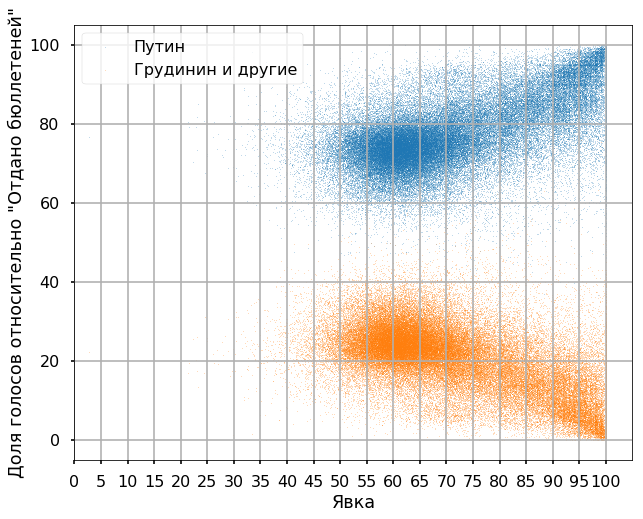

In [20]:
def scatter_votes(df_whole, candidates, region_name=None,  
               min_uik_size=100, denominator='Отдано бюллетеней'):
    df_big = df_whole[df_whole['Число избирателей, включенных в список избирателей'] > min_uik_size]
    if region_name is None:
        df = df_big
    else:
        df = df_big[df_big['region'] == region_name]
    
    votes_ratio = df[candidates].sum(axis=1) / df[denominator]
    
    label = candidates[0].split()[0]
    if len(candidates) > 1:
        label += ' и другие'
    plt.scatter(df['Явка'] * 100, votes_ratio * 100, s=0.1, label=label, alpha=0.5)
    plt.xticks(np.arange(0,105, 5))
    plt.grid(True)
    plt.xlim(0, 105)
    plt.legend()
    plt.xlabel('Явка')
    plt.ylabel('Доля голосов относительно "{}"'.format(denominator));
    
putin = ['Путин Владимир Владимирович']
others = ['Грудинин Павел Николаевич',
 'Жириновский Владимир Вольфович', 
 'Собчак Ксения Анатольевна', 
 'Явлинский Григорий Алексеевич', 
 'Бабурин Сергей Николаевич',
 'Титов Борис Юрьевич']
# scatter_votes(df3, candidates=putin, region_name='Республика Саха (Якутия)')
# scatter_votes(df3, candidates=others, region_name='Республика Саха (Якутия)')

# scatter_votes(df3, candidates=putin, region_name='Московская область')
# scatter_votes(df3, candidates=others, region_name='Московская область')

# scatter_votes(df3, candidates=putin, denominator='Число избирателей, включенных в список избирателей')
# scatter_votes(df3, candidates=others, denominator='Число избирателей, включенных в список избирателей')

# scatter_votes(df3, candidates=putin, region_name='Республика Саха (Якутия)')
# scatter_votes(df3, candidates=others, region_name='Республика Саха (Якутия)')

# scatter_votes(df3, candidates=putin, region_name='Московская область')
# scatter_votes(df3, candidates=others, region_name='Московская область')

scatter_votes(df3, candidates=putin)
scatter_votes(df3, candidates=others)

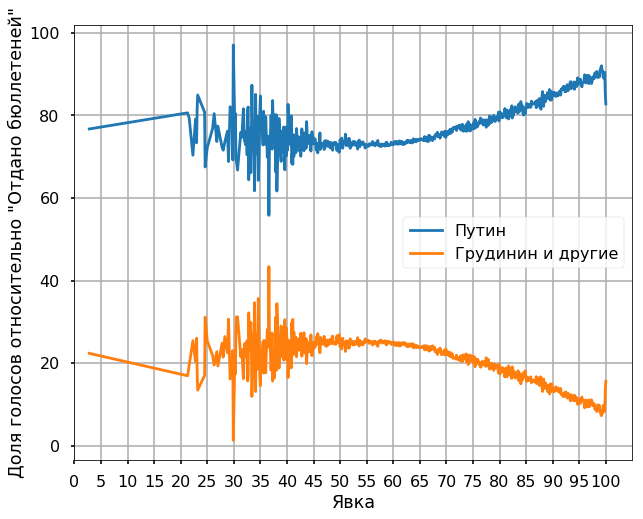

In [21]:
def plot_votes(df_whole, candidates, region_name=None, 
               min_uik_size=100, denominator='Отдано бюллетеней', round_factor=3):
    df_big = df_whole[df_whole['Число избирателей, включенных в список избирателей'] > min_uik_size].copy()
    if region_name is None:
        df = df_big
    else:
        df = df_big[df_big['region'] == region_name]
    
    votes_ratio = df[candidates].sum(axis=1) / df[denominator]
    df['Доля голосов'] = votes_ratio
    df['Явка округленная'] = np.round(df['Явка'], round_factor)
    
    turnout2votes = []
    for turnout in sorted(df['Явка округленная'].unique()):
        turnout2votes.append([turnout, df[df['Явка округленная'] == turnout]['Доля голосов'].mean()])
    turnout2votes = np.array(turnout2votes)
    
    label = candidates[0].split()[0]
    if len(candidates) > 1:
        label += ' и другие'
        
    plt.plot(turnout2votes[:,0] * 100, turnout2votes[:,1] * 100, label=label)
    plt.xticks(np.arange(0,105, 5))
    plt.grid(True)
    plt.xlim(0, 105)
    plt.legend()
    plt.xlabel('Явка')
    plt.ylabel('Доля голосов относительно "{}"'.format(denominator));
    
plot_votes(df3, candidates=putin)#, region_name='Московская область')
plot_votes(df3, candidates=others)#, region_name='Московская область')


56234516.0
15816094.0
45866672.599999994


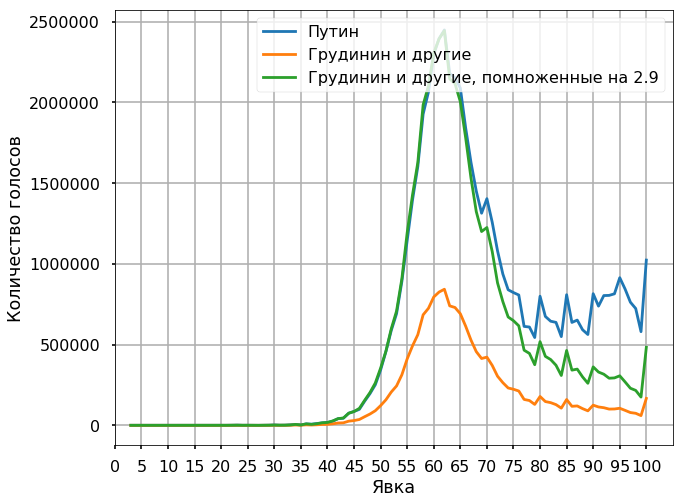

In [22]:
def plot_votes(df_whole, candidates, region_name=None, 
               min_uik_size=100, round_factor=2, multiply=1):
    df_big = df_whole[df_whole['Число избирателей, включенных в список избирателей'] > min_uik_size].copy()
    if region_name is None:
        df = df_big
    else:
        df = df_big[df_big['region'] == region_name]
    
    votes_count = df[candidates].sum(axis=1)
    df['Количество голосов'] = votes_count
    df['Явка округленная'] = np.round(df['Явка'], round_factor)
    
    turnout2votes = []
    for turnout in sorted(df['Явка округленная'].unique()):
        turnout2votes.append([turnout, df[df['Явка округленная'] == turnout]['Количество голосов'].sum()])
    turnout2votes = np.array(turnout2votes)
    
    label = candidates[0].split()[0]
    if len(candidates) > 1:
        label += ' и другие'
    if multiply != 1:
        label += ', помноженные на {}'.format(multiply)
    
    print((turnout2votes[:,1] * multiply).sum())
    plt.plot(turnout2votes[:,0] * 100, turnout2votes[:,1] * multiply, label=label)
    plt.xticks(np.arange(0,105, 5))
    plt.grid(True)
    plt.xlim(0, 105)
    plt.legend()
    plt.xlabel('Явка')
    plt.ylabel('Количество голосов');
    
plot_votes(df3, candidates=putin)#, region_name='Московская область')
plot_votes(df3, candidates=others)#, region_name='Московская область')
plot_votes(df3, candidates=others, multiply=2.9)#, region_name='Московская область')


In [23]:
45866672 / (45866672 + 15816094)

0.7435897410955923